## Análisis de Resultados del Benchmark
Mineria Para Grandes Volumenes de Información

Universidad EAFIT


2025-2

Integrantes:

*   Paula Pirela
*   Carlos Baez
*   Manuela Ramos











Importar librerias a utilizar:

In [1]:
# Importar módulo auxiliar con funciones de análisis
import sys
sys.path.append('./common')

from analysis_utils import (
    procesar_logs_multi_formato,
    renombrar_columnas,
    preparar_datos_para_grafica,
    generar_grafica_comparativa,
    generar_graficas_por_experimento_barras,
    calcular_medias_medianas,
    calcular_y_graficar_consistencia
)

import pandas as pd
import matplotlib.pyplot as plt
import pathlib

Importar datos a utilizar

In [2]:
# Ruta de trabajo actual
RUTA_ACTUAL = pathlib.Path.cwd()
RUTA_LOGS = RUTA_ACTUAL / 'results'

In [3]:
import os
# Procesar todos los archivos .log del directorio
df_logs_procesados = procesar_logs_multi_formato(RUTA_LOGS)

# Mostrar el resultado
print("-" * 50)
print("DataFrame Final (Estructura y Datos):")
print(df_logs_procesados)
print("-" * 50)

--------------------------------------------------
DataFrame Final (Estructura y Datos):
   Subcarpeta_1 Subcarpeta_2 Subcarpeta_3    Archivo_Origen  Execution time  \
0           10k    ex-duckdb          10k  output - 10}.log       43.972269   
1           10k    ex-duckdb          10k   output - 15.log       67.288141   
2           10k    ex-duckdb          10k    output - 5.log       22.381091   
3           10k    ex-duckdb          20k        output.log       44.312887   
4           10k    ex-duckdb          20k        output.log       67.463048   
..          ...          ...          ...               ...             ...   
67           5k    ex-python           15        output.log       59.646205   
68           5k    ex-python            5        output.log       19.612299   
69           5k     ex-spark           10        output.log      124.811323   
70           5k     ex-spark           15        output.log      176.832977   
71           5k     ex-spark            5 

In [4]:
df_logs_procesados

,Subcarpeta_1,Subcarpeta_2,Subcarpeta_3,Archivo_Origen,Execution time,2,4,5
0,10k,ex-duckdb,10k,output - 10}.log,43.972269,47197130,59005544,11797326
1,10k,ex-duckdb,10k,output - 15.log,67.288141,70805972,88503501,17690527
2,10k,ex-duckdb,10k,output - 5.log,22.381091,23597646,29505843,5896511
3,10k,ex-duckdb,20k,output.log,44.312887,47195387,59002879,11801734
4,10k,ex-duckdb,20k,output.log,67.463048,70804425,88499352,17696223
...,...,...,...,...,...,...,...,...
67,5k,ex-python,15,output.log,59.646205,67201555,84010226,16788219
68,5k,ex-python,5,output.log,19.612299,22394769,28008227,5597004
69,5k,ex-spark,10,output.log,124.811323,44803133,56000426,11196441
70,5k,ex-spark,15,output.log,176.832977,67201555,84010226,16788219


## Análisis 1: Comparación General de Experimentos

Gráfico de barras comparando el tiempo promedio de ejecución entre todos los experimentos:

c:\Users\Raspu\GitHub\mineria-benchmark\common\analysis_utils.py:222: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


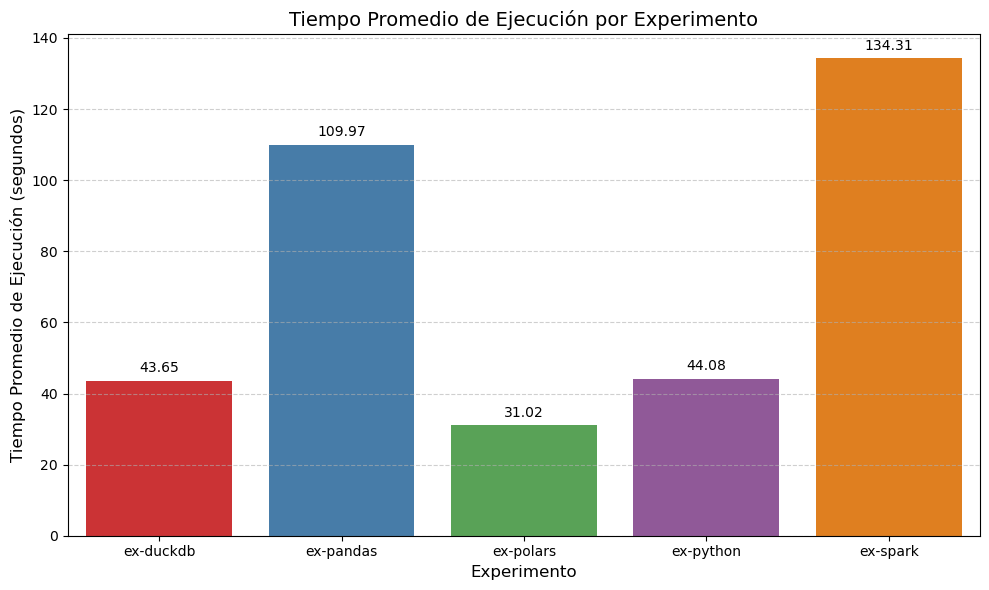

In [5]:
# Renombrar columnas para mejor legibilidad
df_logs_actualizado = renombrar_columnas(df_logs_procesados)

# Generar gráfica comparativa
generar_grafica_comparativa(df_logs_actualizado)

Según esta gráfica, el experimento con polars fue el que menos tiempo promedio de ejecución obtuvo, duckdb y python le siguen con un promedio similar, mientras que pandas y spark demuestran tiempos coparativamente más altos. Por tanto, **polars es el mejor experimento** considerando solo el tiempo promedio de ejecución

## Análisis 2: Tiempo vs. Cantidad de Registros por Experimento

Gráficos individuales mostrando cómo varía el tiempo de ejecución según la cantidad de registros procesados:

c:\Users\Raspu\GitHub\mineria-benchmark\common\analysis_utils.py:288: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\Raspu\GitHub\mineria-benchmark\common\analysis_utils.py:288: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\Raspu\GitHub\mineria-benchmark\common\analysis_utils.py:288: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\Raspu\GitHub\mineria-benchmark\common\analysis_utils.py:288: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variab

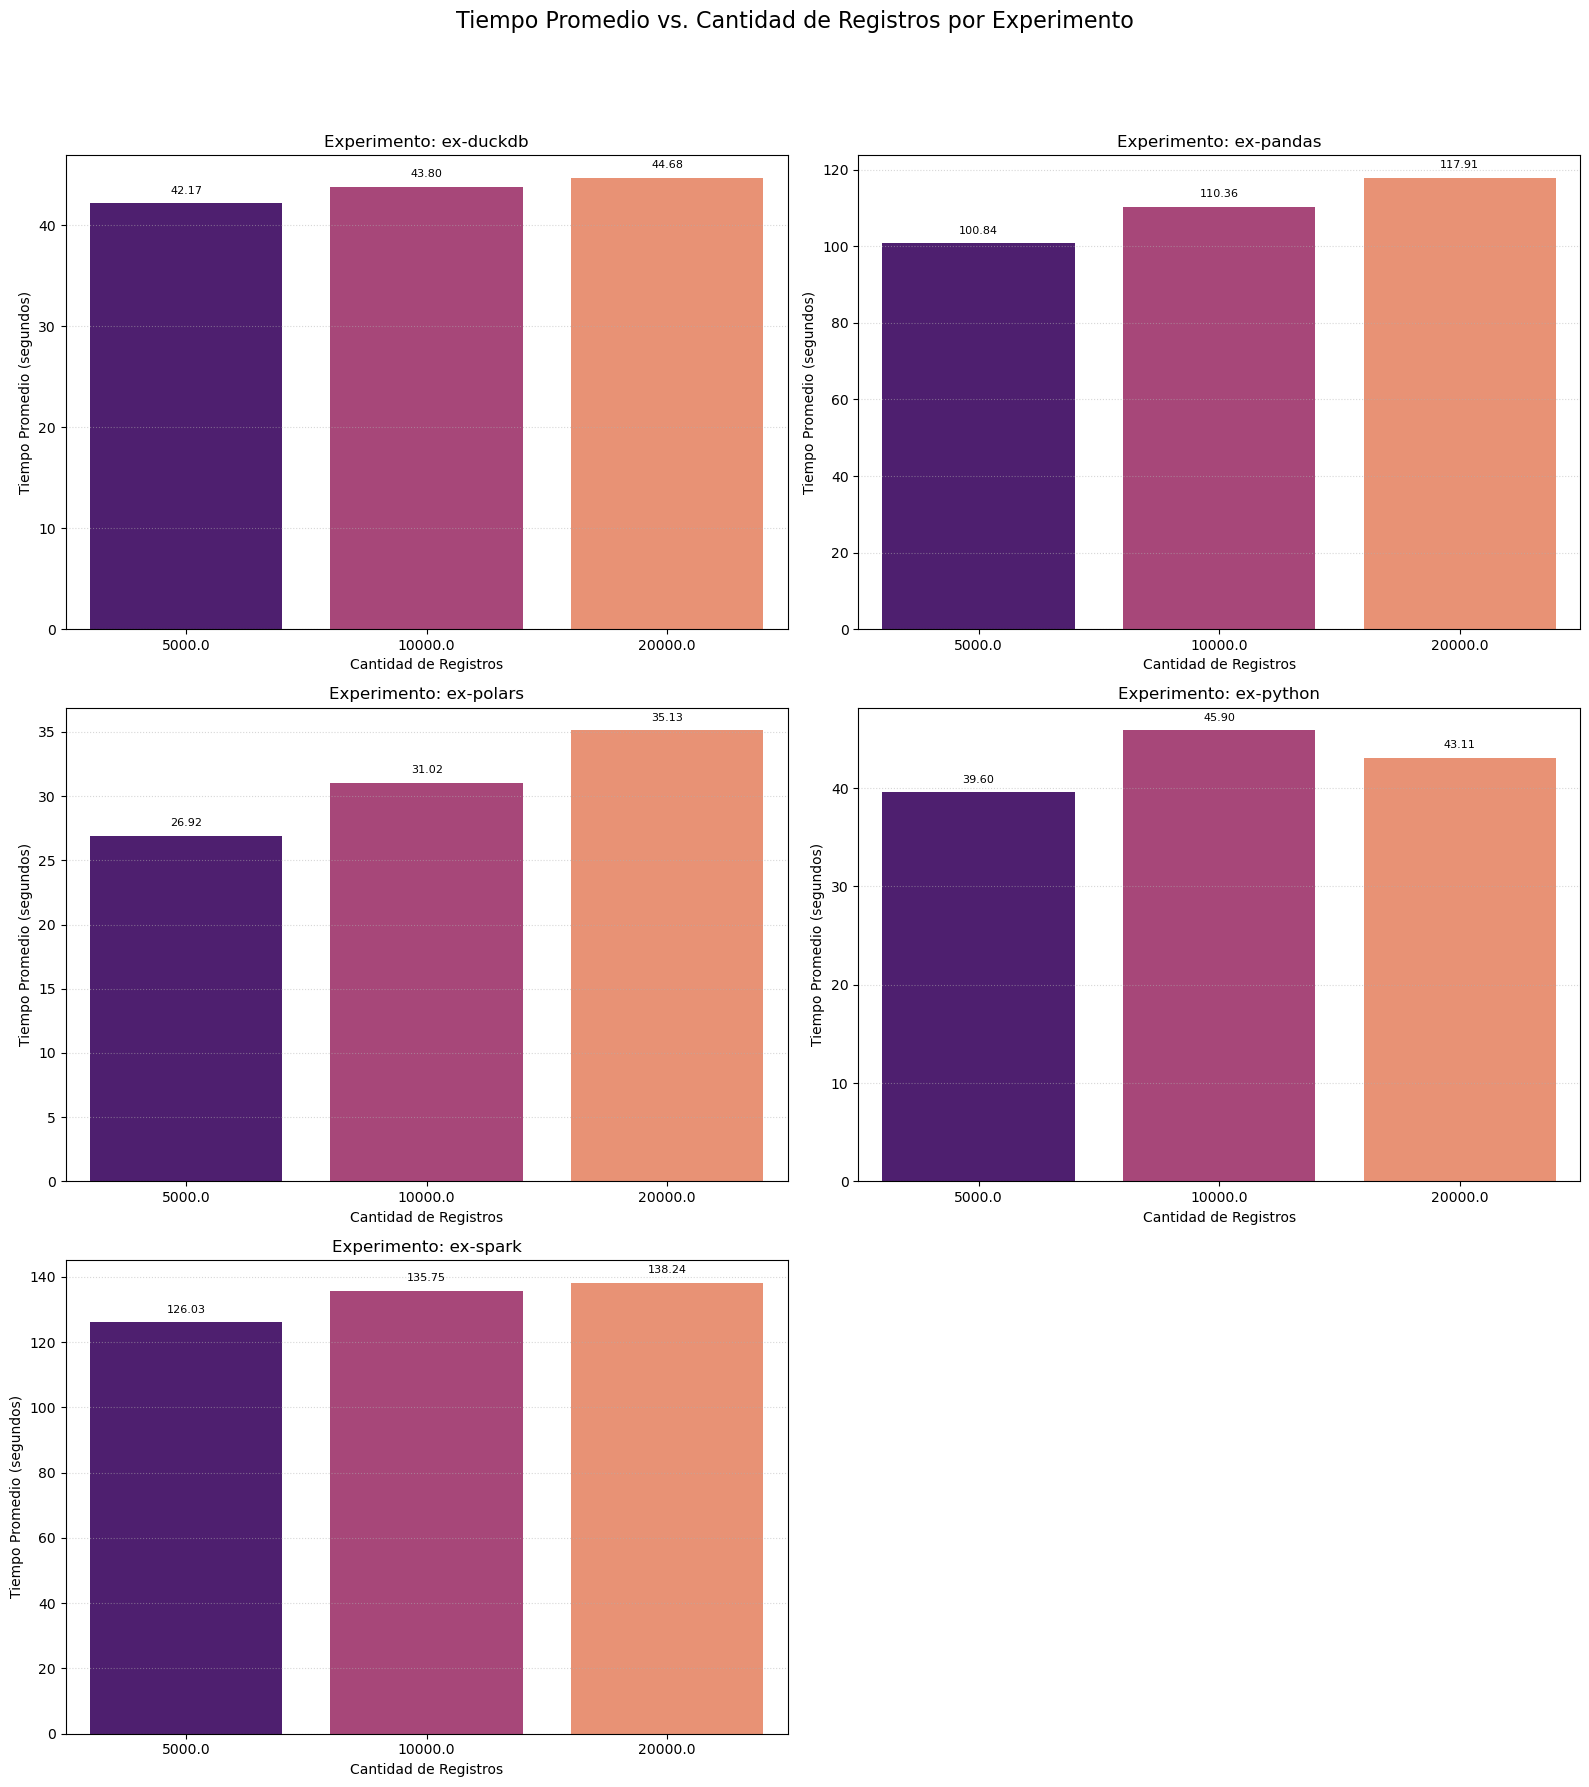

In [6]:
# Preparar datos (convertir notaciones '5k' -> 5000)
df_preparado = preparar_datos_para_grafica(df_logs_procesados)

# Generar gráficos por experimento
generar_graficas_por_experimento_barras(df_preparado)

Comparando el tiempo promedio según la cantidad de archivos por cada experimento, de forma general es escalable: a mayor cantidad de archivos, mayor tiempo promedio de ejecución, a excepción de python que tiene un pico en los 10mil archivos. Este comportamiento inusual podría deberse al overhead de multiprocessing que alcanza un estado más estable de saturación de CPU y cacheo en disco a cargas mayores.

## Análisis 3: Estadísticas Descriptivas

Cálculo de medias, medianas y consistencia que es la diferencia entre la media y la mediana, del tiempo de ejecución por experimento.
> La consistencia permite evaluar la variabilidad de los tiempos de ejecución: valores cercanos a 0 indican que los tiempos son similares entre sí (mayor consistencia), mientras que valores más altos indican mayor variabilidad (menor consistencia).

c:\Users\Raspu\GitHub\mineria-benchmark\common\analysis_utils.py:401: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


ANÁLISIS DE CONSISTENCIA - Diferencia Media-Mediana por Experimento
             Tiempo_Medio (s)  Tiempo_Mediano (s)  Consistencia
experimento                                                    
ex-duckdb           43.652144           43.972269     -0.320125
ex-pandas          109.968989          110.130255     -0.161266
ex-polars           31.021807           29.086219      1.935588
ex-python           44.080045           41.079698      3.000347
ex-spark           134.305393          144.142609     -9.837216


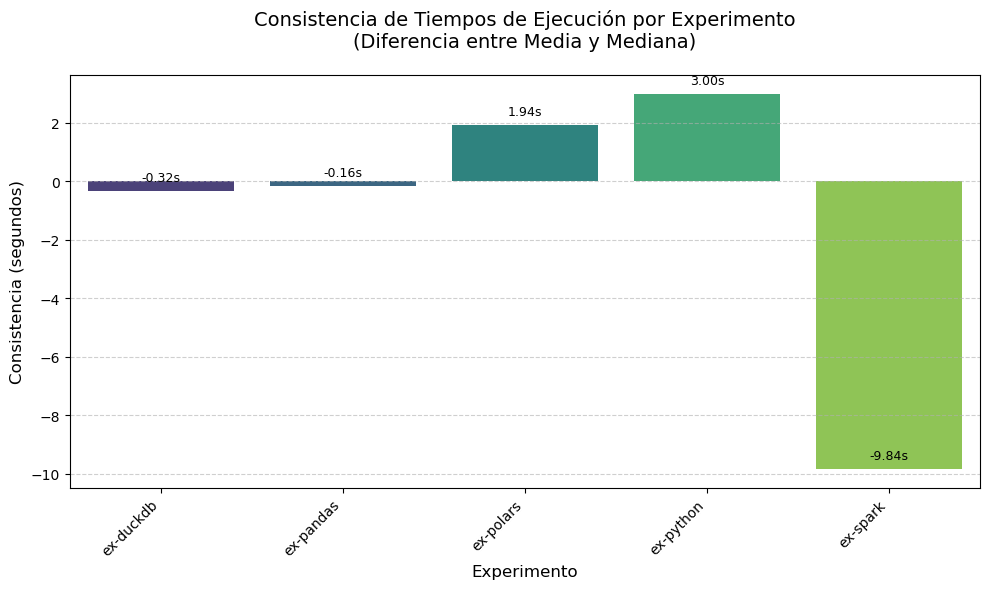

In [9]:
analisis_consistencia = calcular_y_graficar_consistencia(df_preparado)
print("=" * 60)
print("ANÁLISIS DE CONSISTENCIA - Diferencia Media-Mediana por Experimento")
print("=" * 60)
print(analisis_consistencia)


Podemos observar que duckdb y pandas tienen una mejor consistencia pues la distribución de su media y mediana es similar, mientras que polars y python tienen menor valores de consistencia positiva más altos indicando que la media es mayor que la mediana, lo que sugiere la presencia de valores atípicos altos que elevan el promedio. Spark tiene una consistencia negativa, indicando que la mediana es mayor que la media, lo que sugiere una distribución sesgada hacia valores más bajos.

## Analisis de resultados:

*   **polars** es el más rápido en promedio pero tiene una mayor variabilidad cuando se analizan los tiempos de ejecución por numero de registros, sugiriendo que su rendimiento se ve afectado por la escalabilidad. Además su consistencia indica que hay valores atípicos altos que elevan la media.
*   **duckdb** mostró el mejor escalamiento pues su tiempo de ejecución es el más predecible y plano (baja variación) a través de todas las cargas de registros, además tiene una buena consistencia, pero es un poco más lento que polars.
*   **python** mostró un buen rendimiento promedio, pero su tiempo de ejecución varió significativamente con la cantidad de registros, especialmente con un pico inusual en 10,000 registros. Su consistencia también indica la presencia de valores atípicos altos.
*   **pandas** tiene un tiempo de ejecución promedio más alto y una consistencia relativamente buena, pero su escalabilidad es limitada, ya que el tiempo de ejecución aumenta considerablemente con la cantidad de registros.
*   **spark** sorpresivamente es el más lento pero su escalabilidad es buena y la consistencia negativa indica que hay valores atípicos de tiempos de ejecución más bajos. 

**Recomendaciones:**

1.   Prioridad Velocidad Pura: Seleccionar polars.
2.   Prioridad Confiabilidad y Escalabilidad: Seleccionar duckdb.
3. Puntos ciegos: No se conoce concretamente la causa de los picos de latencia en la carga de 10mil registros para python.